In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation
import random
import keras
# 랜덤시드 고정시키기
np.random.seed(42)

In [ ]:
def getGenerator(validation_ratio = 0.1):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split = validation_ratio)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(144, 144),
        batch_size=15,
        class_mode='categorical',
        subset = 'training')

    vali_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(144, 144),
        batch_size=15,
        class_mode='categorical',
        subset = 'validation')

    test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(144, 144),
        batch_size=15,
        class_mode='categorical')
    
    return train_generator, vali_generator, test_generator

In [5]:
from keras import initializers
def getModel():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation=None,padding='same', input_shape=(144,144,3), kernel_initializer='he_normal', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))


    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (1, 1),padding='same', activation=None, kernel_initializer='he_normal', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3),padding='same', activation=None, kernel_initializer='he_normal', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (1, 1),padding='same', activation=None, kernel_initializer='he_normal', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3),padding='same', activation=None, kernel_initializer='he_normal', use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=None, kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32, activation= None, kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(10, activation= None, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    myAdam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=myAdam, metrics=['accuracy'])

    return model

In [6]:
def getModel2(layer_width, lr):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation=None,padding='same', input_shape=(144,144,3), 
                     kernel_initializer=initializers.he_normal(seed=42), use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (1, 1),padding='same', activation=None,  
                     kernel_initializer=initializers.he_normal(seed=42), use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3),padding='same', activation=None, 
                      kernel_initializer=initializers.he_normal(seed=42), use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (1, 1),padding='same', activation=None, 
                      kernel_initializer=initializers.he_normal(seed=42), use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3),padding='same', activation=None, 
                     kernel_initializer=initializers.he_normal(seed=42), use_bias=False))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    
    model.add(Dense(int(layer_width), activation= None, 
                    kernel_initializer=initializers.he_normal(seed=42)))
    model.add(keras.layers.BatchNormalization())
    model.add(Activation('relu'))
    #model.add(keras.layers.Dropout(rate =dropout_rate , noise_shape=None, seed=None))

    model.add(Dense(10, activation= None, 
                     kernel_initializer=initializers.he_normal(seed=42)))
    model.add(Activation('softmax'))
    
    myAdam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=myAdam, metrics=['accuracy'])

    return model

In [ ]:
#model.summary()
test = []
iter = [0.999, 0.99, 0.9, 0.8, 0.7]

In [ ]:
def myrange(start, end, step):
    r = start
    while(r>end):
        yield r
        r += step


In [ ]:
mylist = [ i for i in myrange(0.99,0.001,-0.1)]

In [ ]:
mylist

In [ ]:
import numpy as np
print(np.random.uniform())
print(10**(np.random.uniform(-3,-6)))
print(np.random.uniform(-3,-6))

a = np.random.uniform(-3,-6)
print(a)
print(float(10**(-5.1)))

randomSearchList

In [ ]:
model = getModel2(0.0001, 0.01)
train_generator, vali_generator, test_generator = getGenerator(0.1)
model.fit_generator(
        train_generator,
        steps_per_epoch=30,
        epochs=50,
        validation_data=test_generator,
        validation_steps=10, verbose = 1)

test_loss, test_acc = model.evaluate_generator(test_generator)
test_acc

In [ ]:

layer

In [8]:
randomSearchList = []
max_count = 100
layer = [2**x for x in range(1,11)]

for count in range(max_count):
    train_generator, vali_generator, test_generator = getGenerator(0.5)
    layer_width = random.choice(layer)
    learning_rate = 10**(np.random.uniform(-1,-6))
    print( 'learning_rate:', learning_rate,'layer_width', layer_width, '(' , count, '/' , max_count , ')')
    model = getModel2(layer_width, learning_rate)
    
    model.fit_generator(
        train_generator,
        steps_per_epoch=40,
        epochs=10,
        validation_data=test_generator,
        validation_steps=10, verbose = 2)
    
    test_loss, test_acc = model.evaluate_generator(test_generator)
    cur = {'val_acc' : test_acc, 'learning_rate' : learning_rate, 'layer_width' : layer_width, 'count' : count}
    randomSearchList.append(cur)
    print('val acc:', test_acc, 'learning_rate:', learning_rate,'layer_width', layer_width, '(' , count, '/' , max_count , ')')

Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.012052487076095157 layer_width 8 ( 0 / 100 )
Epoch 1/10
 - 6s - loss: 2.3617 - acc: 0.1300 - val_loss: 2.7106 - val_acc: 0.1400
Epoch 2/10
 - 5s - loss: 2.2931 - acc: 0.1400 - val_loss: 2.4898 - val_acc: 0.1000
Epoch 3/10
 - 5s - loss: 2.2476 - acc: 0.1667 - val_loss: 2.4356 - val_acc: 0.1200
Epoch 4/10
 - 4s - loss: 2.2238 - acc: 0.1767 - val_loss: 2.3195 - val_acc: 0.1733
Epoch 5/10
 - 4s - loss: 2.1999 - acc: 0.2168 - val_loss: 2.7867 - val_acc: 0.1000
Epoch 6/10
 - 5s - loss: 2.1857 - acc: 0.2017 - val_loss: 2.6432 - val_acc: 0.1133
Epoch 7/10
 - 5s - loss: 2.1208 - acc: 0.2117 - val_loss: 2.7526 - val_acc: 0.1267
Epoch 8/10
 - 4s - loss: 2.1009 - acc: 0.2333 - val_loss: 2.2207 - val_acc: 0.1400
Epoch 9/10
 - 4s - loss: 2.1109 - acc: 0.2217 - val_loss: 2.5211 - val_acc: 0.1400
Epoch 10/10
 - 4s - loss: 2.0951 - acc: 0.2250 - val_loss: 2.50

Epoch 4/10
 - 4s - loss: 2.3481 - acc: 0.1233 - val_loss: 2.4290 - val_acc: 0.1200
Epoch 5/10
 - 4s - loss: 2.3481 - acc: 0.1100 - val_loss: 2.3116 - val_acc: 0.1067
Epoch 6/10
 - 4s - loss: 2.3118 - acc: 0.1300 - val_loss: 2.3616 - val_acc: 0.1000
Epoch 7/10
 - 5s - loss: 2.2995 - acc: 0.1350 - val_loss: 2.3252 - val_acc: 0.0867
Epoch 8/10
 - 4s - loss: 2.2676 - acc: 0.1467 - val_loss: 2.3236 - val_acc: 0.1000
Epoch 9/10
 - 5s - loss: 2.2689 - acc: 0.1733 - val_loss: 2.3073 - val_acc: 0.0933
Epoch 10/10
 - 4s - loss: 2.2853 - acc: 0.1717 - val_loss: 2.3044 - val_acc: 0.1133
val acc: 0.1400000048428774 learning_rate: 0.001128692239048643 layer_width 2 ( 7 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.026850222506591415 layer_width 1024 ( 8 / 100 )
Epoch 1/10
 - 7s - loss: 7.3349 - acc: 0.1183 - val_loss: 13.6636 - val_acc: 0.1067
Epoch 2/10
 - 5s - loss: 3.2444 - acc: 0.1383 - val

Epoch 9/10
 - 5s - loss: 1.8864 - acc: 0.3750 - val_loss: 1.9437 - val_acc: 0.3400
Epoch 10/10
 - 4s - loss: 1.8812 - acc: 0.3550 - val_loss: 1.7430 - val_acc: 0.3333
val acc: 0.3320000080764294 learning_rate: 0.00022166884909574844 layer_width 64 ( 14 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 8.488850403962575e-06 layer_width 8 ( 15 / 100 )
Epoch 1/10
 - 7s - loss: 2.4756 - acc: 0.1167 - val_loss: 2.5075 - val_acc: 0.1333
Epoch 2/10
 - 4s - loss: 2.5771 - acc: 0.1017 - val_loss: 2.4916 - val_acc: 0.1267
Epoch 3/10
 - 4s - loss: 2.4734 - acc: 0.1183 - val_loss: 2.4701 - val_acc: 0.1467
Epoch 4/10
 - 4s - loss: 2.5136 - acc: 0.0950 - val_loss: 2.4653 - val_acc: 0.1333
Epoch 5/10
 - 4s - loss: 2.5230 - acc: 0.1233 - val_loss: 2.4320 - val_acc: 0.1267
Epoch 6/10
 - 4s - loss: 2.4861 - acc: 0.1117 - val_loss: 2.4177 - val_acc: 0.1267
Epoch 7/10
 - 4s - loss: 2.4791 - acc: 0.1050 - v

Epoch 1/10
 - 8s - loss: 2.5585 - acc: 0.1250 - val_loss: 2.6404 - val_acc: 0.1133
Epoch 2/10
 - 5s - loss: 2.4986 - acc: 0.1350 - val_loss: 2.6394 - val_acc: 0.1200
Epoch 3/10
 - 4s - loss: 2.3611 - acc: 0.1683 - val_loss: 2.5450 - val_acc: 0.1200
Epoch 4/10
 - 5s - loss: 2.3510 - acc: 0.1600 - val_loss: 2.5448 - val_acc: 0.1667
Epoch 5/10
 - 4s - loss: 2.3520 - acc: 0.1600 - val_loss: 2.5255 - val_acc: 0.1600
Epoch 6/10
 - 4s - loss: 2.3687 - acc: 0.1717 - val_loss: 2.4639 - val_acc: 0.1600
Epoch 7/10
 - 4s - loss: 2.3245 - acc: 0.1833 - val_loss: 2.4233 - val_acc: 0.1667
Epoch 8/10
 - 5s - loss: 2.2051 - acc: 0.2533 - val_loss: 2.4075 - val_acc: 0.1600
Epoch 9/10
 - 5s - loss: 2.2587 - acc: 0.2150 - val_loss: 2.3927 - val_acc: 0.1867
Epoch 10/10
 - 6s - loss: 2.2221 - acc: 0.2233 - val_loss: 2.3461 - val_acc: 0.1867
val acc: 0.24000000908970834 learning_rate: 2.7644310901162296e-05 layer_width 32 ( 22 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 

Epoch 6/10
 - 5s - loss: 2.2516 - acc: 0.1650 - val_loss: 2.7413 - val_acc: 0.1067
Epoch 7/10
 - 5s - loss: 2.2685 - acc: 0.1517 - val_loss: 2.4806 - val_acc: 0.1067
Epoch 8/10
 - 4s - loss: 2.2304 - acc: 0.1583 - val_loss: 2.3128 - val_acc: 0.1667
Epoch 9/10
 - 5s - loss: 2.2241 - acc: 0.1883 - val_loss: 2.2862 - val_acc: 0.1600
Epoch 10/10
 - 5s - loss: 2.2041 - acc: 0.1833 - val_loss: 2.2571 - val_acc: 0.1600
val acc: 0.16000000543892384 learning_rate: 0.0008727881357999261 layer_width 4 ( 29 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.005886896810748295 layer_width 16 ( 30 / 100 )
Epoch 1/10
 - 9s - loss: 2.3107 - acc: 0.1700 - val_loss: 4.9997 - val_acc: 0.1133
Epoch 2/10
 - 4s - loss: 2.1412 - acc: 0.2367 - val_loss: 2.3882 - val_acc: 0.1600
Epoch 3/10
 - 5s - loss: 2.1525 - acc: 0.2100 - val_loss: 2.5016 - val_acc: 0.1667
Epoch 4/10
 - 5s - loss: 2.0866 - acc: 0.2433 - va

val acc: 0.33800000794231894 learning_rate: 0.0002948253509781483 layer_width 32 ( 36 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 3.582715184511953e-05 layer_width 128 ( 37 / 100 )
Epoch 1/10
 - 10s - loss: 2.5508 - acc: 0.1350 - val_loss: 2.5885 - val_acc: 0.1267
Epoch 2/10
 - 5s - loss: 2.4611 - acc: 0.1567 - val_loss: 2.4317 - val_acc: 0.1933
Epoch 3/10
 - 4s - loss: 2.3312 - acc: 0.2200 - val_loss: 2.2789 - val_acc: 0.2400
Epoch 4/10
 - 5s - loss: 2.2472 - acc: 0.2233 - val_loss: 2.3385 - val_acc: 0.1733
Epoch 5/10
 - 5s - loss: 2.2285 - acc: 0.2333 - val_loss: 2.2923 - val_acc: 0.2333
Epoch 6/10
 - 5s - loss: 2.2436 - acc: 0.1983 - val_loss: 2.2945 - val_acc: 0.2333
Epoch 7/10
 - 4s - loss: 2.0869 - acc: 0.2766 - val_loss: 2.2679 - val_acc: 0.2067
Epoch 8/10
 - 4s - loss: 2.1149 - acc: 0.2683 - val_loss: 2.3261 - val_acc: 0.2333
Epoch 9/10
 - 4s - loss: 2.0103 - acc: 0.3050 -

Epoch 2/10
 - 5s - loss: 2.1586 - acc: 0.2800 - val_loss: 2.2834 - val_acc: 0.3000
Epoch 3/10
 - 5s - loss: 2.0940 - acc: 0.2850 - val_loss: 2.0949 - val_acc: 0.3200
Epoch 4/10
 - 5s - loss: 2.0138 - acc: 0.3017 - val_loss: 2.3504 - val_acc: 0.2667
Epoch 5/10
 - 5s - loss: 1.9575 - acc: 0.3350 - val_loss: 2.4084 - val_acc: 0.2667
Epoch 6/10
 - 5s - loss: 1.9450 - acc: 0.3400 - val_loss: 2.0159 - val_acc: 0.3467
Epoch 7/10
 - 5s - loss: 1.9092 - acc: 0.3500 - val_loss: 2.1076 - val_acc: 0.3200
Epoch 8/10
 - 5s - loss: 1.9231 - acc: 0.3350 - val_loss: 1.9830 - val_acc: 0.3600
Epoch 9/10
 - 5s - loss: 1.8893 - acc: 0.3517 - val_loss: 1.9643 - val_acc: 0.3200
Epoch 10/10
 - 5s - loss: 1.9440 - acc: 0.3267 - val_loss: 2.0333 - val_acc: 0.3200
val acc: 0.2940000096708536 learning_rate: 0.00013048711834979355 layer_width 256 ( 44 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.003959699651

Epoch 7/10
 - 5s - loss: 2.6309 - acc: 0.1117 - val_loss: 2.6037 - val_acc: 0.1267
Epoch 8/10
 - 5s - loss: 2.5810 - acc: 0.1167 - val_loss: 2.5906 - val_acc: 0.1200
Epoch 9/10
 - 5s - loss: 2.5604 - acc: 0.1183 - val_loss: 2.5828 - val_acc: 0.1200
Epoch 10/10
 - 4s - loss: 2.5402 - acc: 0.1350 - val_loss: 2.5742 - val_acc: 0.1200
val acc: 0.11600000470876694 learning_rate: 1.5371299467143716e-06 layer_width 128 ( 51 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 2.358494940967428e-06 layer_width 32 ( 52 / 100 )
Epoch 1/10
 - 12s - loss: 2.6503 - acc: 0.0917 - val_loss: 2.6121 - val_acc: 0.0800
Epoch 2/10
 - 5s - loss: 2.6027 - acc: 0.0967 - val_loss: 2.6101 - val_acc: 0.0800
Epoch 3/10
 - 5s - loss: 2.6232 - acc: 0.1017 - val_loss: 2.6034 - val_acc: 0.0800
Epoch 4/10
 - 5s - loss: 2.5944 - acc: 0.1117 - val_loss: 2.5978 - val_acc: 0.0733
Epoch 5/10
 - 4s - loss: 2.5650 - acc: 0.1100

Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 6.303246882827638e-06 layer_width 64 ( 59 / 100 )
Epoch 1/10
 - 14s - loss: 2.6557 - acc: 0.1117 - val_loss: 2.6458 - val_acc: 0.0867
Epoch 2/10
 - 5s - loss: 2.6134 - acc: 0.1067 - val_loss: 2.5859 - val_acc: 0.1267
Epoch 3/10
 - 5s - loss: 2.5344 - acc: 0.1267 - val_loss: 2.5308 - val_acc: 0.1267
Epoch 4/10
 - 5s - loss: 2.5576 - acc: 0.1400 - val_loss: 2.5111 - val_acc: 0.1267
Epoch 5/10
 - 5s - loss: 2.5131 - acc: 0.1133 - val_loss: 2.4990 - val_acc: 0.1267
Epoch 6/10
 - 5s - loss: 2.5064 - acc: 0.1100 - val_loss: 2.4738 - val_acc: 0.1267
Epoch 7/10
 - 5s - loss: 2.4723 - acc: 0.1517 - val_loss: 2.4846 - val_acc: 0.1200
Epoch 8/10
 - 5s - loss: 2.4921 - acc: 0.1383 - val_loss: 2.4715 - val_acc: 0.1200
Epoch 9/10
 - 5s - loss: 2.4545 - acc: 0.1500 - val_loss: 2.4475 - val_acc: 0.1333
Epoch 10/10
 - 5s - loss: 2.4085 - acc: 0.1450 - val_loss: 2.4058 - val_acc: 0.1333
val acc: 0.1500000

Epoch 4/10
 - 5s - loss: 2.0805 - acc: 0.2883 - val_loss: 2.2184 - val_acc: 0.3133
Epoch 5/10
 - 4s - loss: 2.0816 - acc: 0.2917 - val_loss: 2.3762 - val_acc: 0.2933
Epoch 6/10
 - 5s - loss: 2.0372 - acc: 0.3150 - val_loss: 2.6685 - val_acc: 0.1933
Epoch 7/10
 - 4s - loss: 2.0203 - acc: 0.3300 - val_loss: 2.7809 - val_acc: 0.2600
Epoch 8/10
 - 5s - loss: 2.0301 - acc: 0.2900 - val_loss: 2.2724 - val_acc: 0.2733
Epoch 9/10
 - 4s - loss: 1.9439 - acc: 0.3282 - val_loss: 3.2491 - val_acc: 0.2267
Epoch 10/10
 - 5s - loss: 2.0024 - acc: 0.3250 - val_loss: 2.4931 - val_acc: 0.3267
val acc: 0.31600000865757466 learning_rate: 0.0011631877070893797 layer_width 512 ( 66 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.05385559545067674 layer_width 64 ( 67 / 100 )
Epoch 1/10
 - 14s - loss: 2.4736 - acc: 0.1617 - val_loss: 3.3529 - val_acc: 0.1467
Epoch 2/10
 - 5s - loss: 2.2155 - acc: 0.1950 - 

Epoch 9/10
 - 5s - loss: 2.4066 - acc: 0.1817 - val_loss: 2.3969 - val_acc: 0.1600
Epoch 10/10
 - 5s - loss: 2.3201 - acc: 0.2133 - val_loss: 2.3906 - val_acc: 0.1467
val acc: 0.1860000068694353 learning_rate: 4.319811909306979e-06 layer_width 256 ( 73 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.0199081737181942 layer_width 1024 ( 74 / 100 )
Epoch 1/10
 - 16s - loss: 5.9283 - acc: 0.1083 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 2/10
 - 5s - loss: 3.2495 - acc: 0.1483 - val_loss: 10.6786 - val_acc: 0.1667
Epoch 3/10
 - 5s - loss: 2.4187 - acc: 0.1633 - val_loss: 8.2344 - val_acc: 0.1467
Epoch 4/10
 - 6s - loss: 2.1827 - acc: 0.2117 - val_loss: 2.3220 - val_acc: 0.1600
Epoch 5/10
 - 5s - loss: 2.1254 - acc: 0.2033 - val_loss: 3.2939 - val_acc: 0.2200
Epoch 6/10
 - 5s - loss: 2.1744 - acc: 0.2233 - val_loss: 3.0084 - val_acc: 0.1667
Epoch 7/10
 - 5s - loss: 2.0789 - acc: 0.2883 

Epoch 1/10
 - 17s - loss: 2.4350 - acc: 0.1417 - val_loss: 2.5501 - val_acc: 0.1667
Epoch 2/10
 - 5s - loss: 2.2984 - acc: 0.2000 - val_loss: 2.4259 - val_acc: 0.1867
Epoch 3/10
 - 5s - loss: 2.2436 - acc: 0.2133 - val_loss: 2.3996 - val_acc: 0.1867
Epoch 4/10
 - 5s - loss: 2.1634 - acc: 0.2233 - val_loss: 2.2535 - val_acc: 0.2133
Epoch 5/10
 - 4s - loss: 2.1611 - acc: 0.2283 - val_loss: 2.1877 - val_acc: 0.2600
Epoch 6/10
 - 5s - loss: 2.1458 - acc: 0.2333 - val_loss: 2.1065 - val_acc: 0.2733
Epoch 7/10
 - 5s - loss: 2.0864 - acc: 0.3100 - val_loss: 2.0917 - val_acc: 0.3333
Epoch 8/10
 - 5s - loss: 2.1082 - acc: 0.2683 - val_loss: 2.0714 - val_acc: 0.3133
Epoch 9/10
 - 5s - loss: 2.0831 - acc: 0.2417 - val_loss: 1.9985 - val_acc: 0.3333
Epoch 10/10
 - 5s - loss: 2.0563 - acc: 0.2733 - val_loss: 1.9754 - val_acc: 0.3467
val acc: 0.31600001104176045 learning_rate: 9.425956261541057e-05 layer_width 32 ( 81 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 

Epoch 6/10
 - 5s - loss: 1.9575 - acc: 0.2883 - val_loss: 2.2786 - val_acc: 0.2333
Epoch 7/10
 - 5s - loss: 2.0080 - acc: 0.2950 - val_loss: 1.8556 - val_acc: 0.4067
Epoch 8/10
 - 6s - loss: 1.9560 - acc: 0.3183 - val_loss: 3.2235 - val_acc: 0.2267
Epoch 9/10
 - 5s - loss: 1.8965 - acc: 0.3383 - val_loss: 2.3523 - val_acc: 0.2667
Epoch 10/10
 - 5s - loss: 1.9109 - acc: 0.3183 - val_loss: 2.4847 - val_acc: 0.3067
val acc: 0.2580000089108944 learning_rate: 0.003493139605891122 layer_width 128 ( 88 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.0028248979498897357 layer_width 4 ( 89 / 100 )
Epoch 1/10
 - 19s - loss: 2.4335 - acc: 0.1150 - val_loss: 4.0116 - val_acc: 0.1533
Epoch 2/10
 - 5s - loss: 2.3235 - acc: 0.1433 - val_loss: 2.6343 - val_acc: 0.1867
Epoch 3/10
 - 5s - loss: 2.2812 - acc: 0.1450 - val_loss: 2.4907 - val_acc: 0.1733
Epoch 4/10
 - 5s - loss: 2.2800 - acc: 0.1333 - v

val acc: 0.31400001026690005 learning_rate: 0.001058614713572124 layer_width 64 ( 95 / 100 )
Found 6500 images belonging to 10 classes.
Found 6500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
learning_rate: 0.03720539498245908 layer_width 16 ( 96 / 100 )
Epoch 1/10
 - 20s - loss: 2.3463 - acc: 0.1183 - val_loss: 6.1908 - val_acc: 0.1133
Epoch 2/10
 - 5s - loss: 2.2443 - acc: 0.1567 - val_loss: 3.7715 - val_acc: 0.1200
Epoch 3/10
 - 5s - loss: 2.2258 - acc: 0.1800 - val_loss: 2.1440 - val_acc: 0.2133
Epoch 4/10
 - 5s - loss: 2.2083 - acc: 0.1600 - val_loss: 2.3540 - val_acc: 0.1733
Epoch 5/10
 - 5s - loss: 2.1875 - acc: 0.1683 - val_loss: 2.2717 - val_acc: 0.1867
Epoch 6/10
 - 5s - loss: 2.1560 - acc: 0.2000 - val_loss: 2.6810 - val_acc: 0.1333
Epoch 7/10
 - 5s - loss: 2.1524 - acc: 0.2050 - val_loss: 4.2739 - val_acc: 0.1133
Epoch 8/10
 - 5s - loss: 2.0853 - acc: 0.2400 - val_loss: 2.8972 - val_acc: 0.1733
Epoch 9/10
 - 5s - loss: 2.1221 - acc: 0.2150 - val

In [ ]:
for i, ratio in enumerate(myrange(0.999,0.001,-0.1)):
    model = getModel()
    train_generator, vali_generator, test_generator = getGenerator(ratio)
    model.fit_generator(
        train_generator,
        steps_per_epoch=32,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5, verbose = 2)

    test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
    print('test acc:', test_acc)
    test.append(test_acc)

In [22]:
print(10**-1)
print(10**-6)

0.1
1e-06


In [ ]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(test, 'y', label='train loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

#loss_ax.legend(loc='upper left')


plt.show()

In [16]:
import copy
backup = list(randomSearchList)

In [19]:
#randomSearchList.sort()
import operator
randomSearchList.sort(key=operator.itemgetter('val_acc'), reverse=True)


In [21]:
layer

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [ ]:
list_acc = []
list_lr = []
list_width = []

for i in randomSearchList:
    list_acc.append(i['val_acc'] )
    list_lr.append(i['learning_rate'] )
    list_width.append(i['layer_width'] )
    
#randomSearchList[0]['val_acc']
#list1 = randomSearchList[learning_rate]

In [24]:
randomSearchList

[{'val_acc': 0.3440000084787607,
  'learning_rate': 0.00036825838461260766,
  'layer_width': 1024,
  'count': 19},
 {'val_acc': 0.34000000715255735,
  'learning_rate': 3.953225811988346e-05,
  'layer_width': 256,
  'count': 97},
 {'val_acc': 0.33800000794231894,
  'learning_rate': 0.0002948253509781483,
  'layer_width': 32,
  'count': 36},
 {'val_acc': 0.33600000977516176,
  'learning_rate': 0.0002044251576392349,
  'layer_width': 32,
  'count': 20},
 {'val_acc': 0.3320000080764294,
  'learning_rate': 0.00022166884909574844,
  'layer_width': 64,
  'count': 14},
 {'val_acc': 0.3280000093579292,
  'learning_rate': 0.012690084620230113,
  'layer_width': 256,
  'count': 21},
 {'val_acc': 0.32200001150369645,
  'learning_rate': 8.679520819937163e-06,
  'layer_width': 1024,
  'count': 6},
 {'val_acc': 0.3220000086724758,
  'learning_rate': 0.002001967631901634,
  'layer_width': 512,
  'count': 60},
 {'val_acc': 0.3220000083744526,
  'learning_rate': 0.00012035424768700718,
  'layer_width': 6

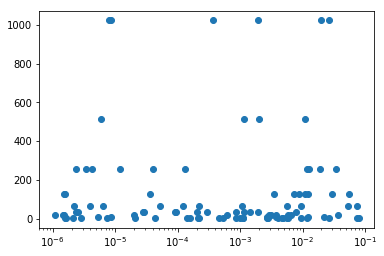

In [46]:
import numpy as np
import matplotlib.pyplot as plt

line = plt.figure()
plt.xscale('log') 
#plt.set_xscale('log')
np.random.seed(5)
x = np.arange(0, 1)
y = 20 + 3 * x + np.random.normal(0, 60, 100)
plt.plot(list_lr,list_width, "o")

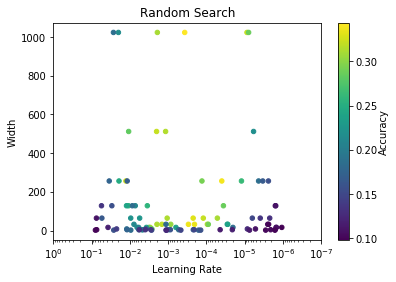

In [65]:
marker_size=20
plt.scatter(list_lr, list_width, marker_size, c=list_acc)
plt.xlim([1e-0,1e-7])
plt.xscale('log') 
plt.title("Random Search")
plt.xlabel("Learning Rate")
plt.ylabel("Width")

cbar= plt.colorbar()
cbar.solids.set_edgecolor("face")
cbar.set_label("Accuracy", labelpad=+1)
plt.show()

In [25]:
train_generator, vali_generator, test_generator = getGenerator(0.1)

model = getModel2(1024, 0.0005)
    
model.fit_generator(
        train_generator,
        steps_per_epoch=40,
        epochs=400,
        validation_data=test_generator,
        validation_steps=10, verbose = 2)
    

Found 11700 images belonging to 10 classes.
Found 1300 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Epoch 1/400


ResourceExhaustedError: OOM when allocating tensor with shape[15,64,144,144] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training_102/Adam/gradients/AddN_22-1-TransposeNHWCToNCHW-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_102/Adam/gradients/batch_normalization_613/cond/batchnorm/mul_1/Switch_grad/cond_grad, PermConstNHWCToNCHW-LayoutOptimizer)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: batch_normalization_614/Shape/_46415 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_626_batch_normalization_614/Shape", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
